In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('politifact_scraperussia17012023 - politifact_scraperussia17012023.csv')
df.drop(('idx'), axis=1, inplace=True)
df1 = pd.read_csv('politifact_scraperussia-ukriane05022023.csv')
df1.drop(('idx'), axis=1, inplace=True)
df1 = df1[df1['topic'] != 'russia-ukriane']
df = pd.concat([df, df1], axis=0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'politifact_scraperussia17012023 - politifact_scraperussia17012023.csv'

In [3]:
for i in df['topic'].unique():
  print(i, df[df['topic'] == i].shape)

war (2150, 6)

syria (316, 6)

conflict (800, 6)

ethiopia (22, 6)

civil-conflict (1977, 6)

weapons (1012, 6)

guns (1258, 6)

war-crimes (1960, 6)

insurgency (75, 6)

eritrea (9, 6)

myanmar (11, 6)

burma (11, 6)

al-qaeda (715, 6)

iran (432, 6)

yemen (91, 6)

afghanistan (492, 6)

ukraine (220, 6)

russia (746, 6)


In [4]:
df['year_of_publish'] = df['stated_on'].apply(lambda x: int(x[-4:]))
df['month_of_publish'] = df['stated_on'].apply(lambda x: x.split(',')[0].split(' ')[0].strip())
df['day_of_publish'] = df['stated_on'].apply(lambda x: int(x.split(',')[0].split(' ')[1]))
df.head()

,claim,origin,URL,truth_value,stated_on,topic,year_of_publish,month_of_publish,day_of_publish
0,A “default on our debt” would be unprecedented...,Hakeem Jeffries,https://www.politifact.com/factchecks/2023/jan...,meter-mostly-true,"January 08, 2023",war,2023,January,8
1,"As president, Donald Trump “marshaled the full...",Hakeem Jeffries,https://www.politifact.com/factchecks/2023/jan...,meter-mostly-false,"January 06, 2023",war,2023,January,6
2,A video shows migrants faking tears for news c...,Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"March 02, 2020",war,2020,March,2
3,"After Joe Biden became vice president, at the ...",Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"December 16, 2022",war,2022,December,16
4,"Says he has been to “Afghanistan, Iraq and tho...",Hakeem Jeffries,https://www.politifact.com/factchecks/2022/dec...,meter-false,"December 16, 2022",war,2022,December,16


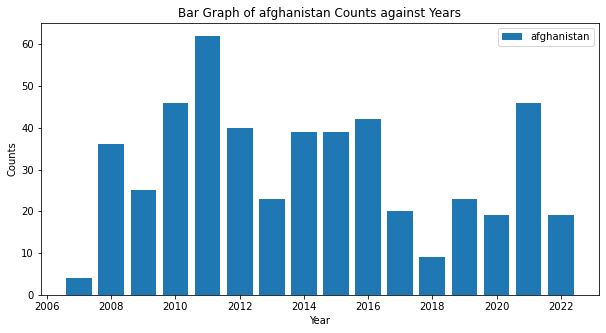

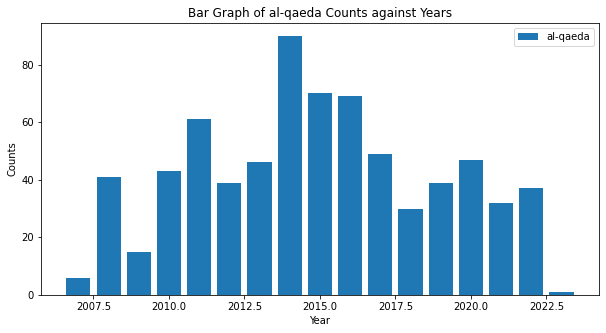

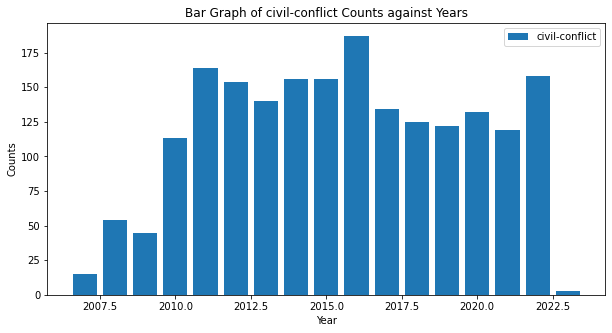

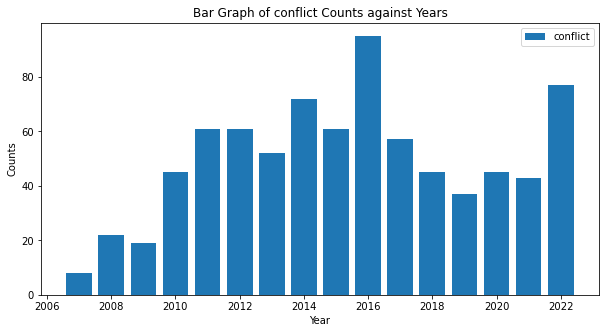

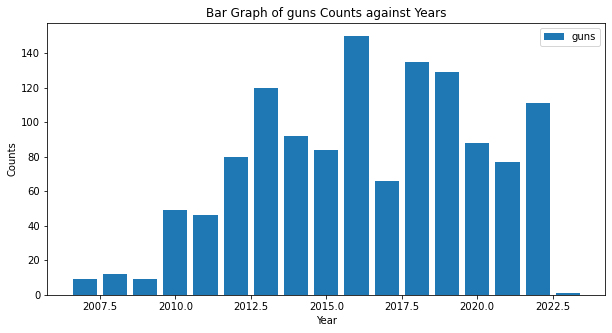

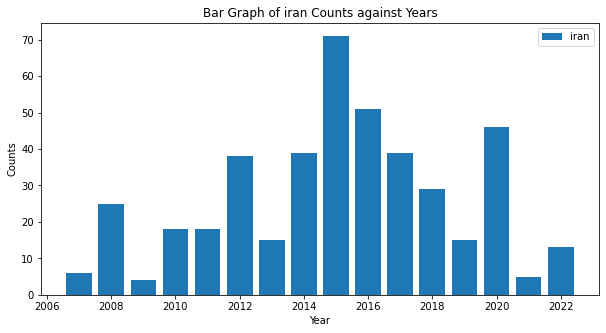

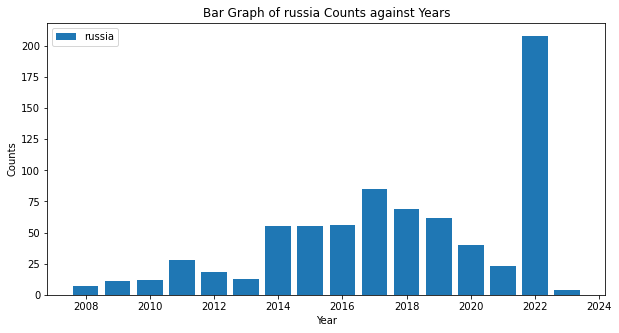

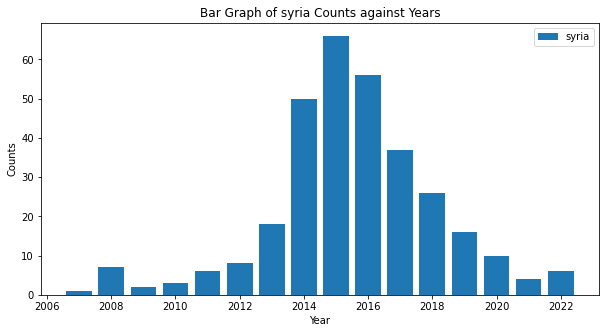

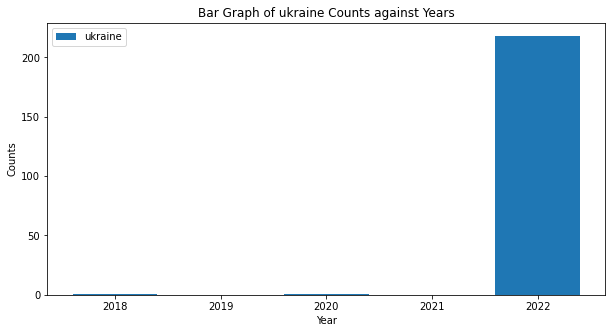

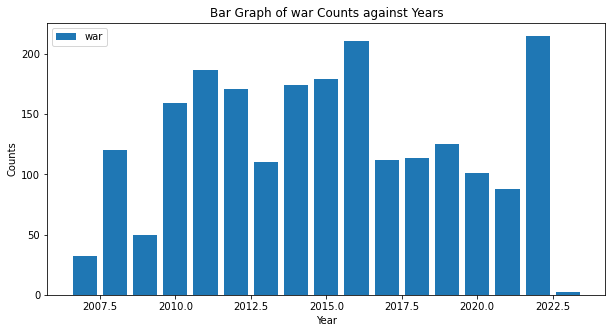

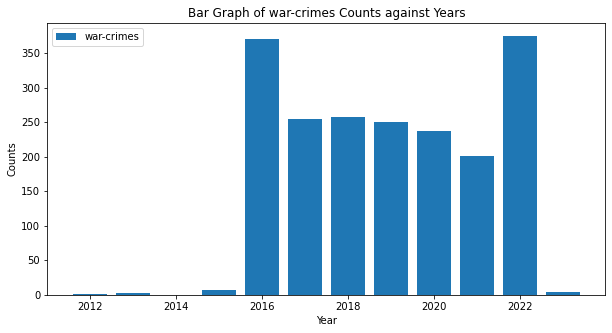

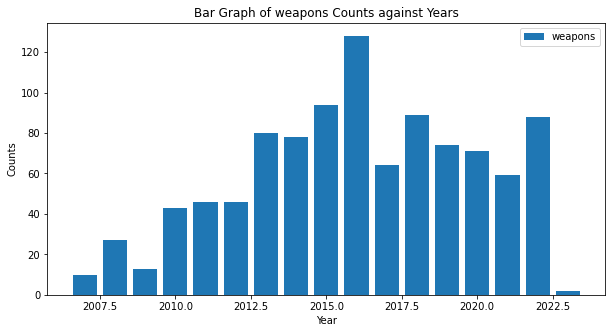

In [5]:
years = df['year_of_publish'].unique()
# Group the data by year and topic, and count the number of occurrences of each topic
grouped = df.groupby(['year_of_publish', 'topic']).size().reset_index(name='counts')
# Plot the bar graph
for topic, group in grouped.groupby('topic'):
    if topic in ['eritrea', 'myanmar', 'burma', 'yemen', 'ethiopia', 'insurgency']:
        continue
    plt.figure(figsize=(10, 5))
    plt.bar(group['year_of_publish'], group['counts'], label=topic)
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title(f'Bar Graph of {topic} Counts against Years')
    plt.legend()
    plt.show()

In [6]:
import re

# Create a boolean mask that indicates which rows contain the keyword
mask = ((df['claim'].apply(lambda x: bool(re.search('russia|ukraine', x, re.IGNORECASE)))) & (df['topic'].isin(df['topic'].unique()))) | (df['topic'].isin(('russia', 'ukraine')))

# Use the mask to extract only the rows that contain the keyword
ndf = df[mask]
pd.options.display.max_rows = 999 
pd.set_option('display.max_colwidth', None)
ndf.drop(['URL', 'stated_on', 'origin'], axis=1, inplace=True)
ndf.reset_index(drop=True, inplace=True)
ndf.head()

c:\Users\Lokesh\.conda\envs\dlapp\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  return super().drop(


,claim,truth_value,topic,year_of_publish,month_of_publish,day_of_publish
0,Russia’s Army was “destroyed.”,meter-false,war,2022,December,18
1,The war in Ukraine is “all over.”,meter-false,war,2022,December,12
2,“Gas prices are down back to where they were before Russia invaded Ukraine.”,meter-true,war,2022,November,29
3,"Images of a woman having bloody makeup applied show ""fake combatant photos” in Ukraine.",meter-false,war,2022,November,27
4,U.S. tax dollars sent to help Ukraine were laundered back by cryptocurrency firm FTX to help Democrats in midterms.,meter-false,war,2022,November,13


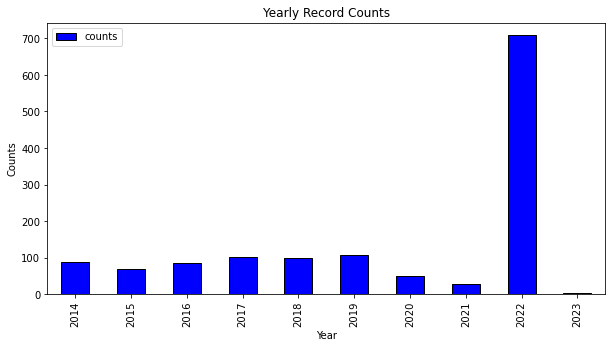

In [7]:
# Count the number of records for each year
yearly_counts = ndf.groupby(ndf['year_of_publish']).size().reset_index(name='counts')

# Plot the bar graph
yearly_counts[yearly_counts['year_of_publish'] >= 2014].plot.bar(x='year_of_publish', y='counts', color='blue', edgecolor='black', figsize=(10, 5))

# Add the title and labels to the graph
plt.title('Yearly Record Counts')
plt.xlabel('Year')
plt.ylabel('Counts')

# Show the plot
plt.show()

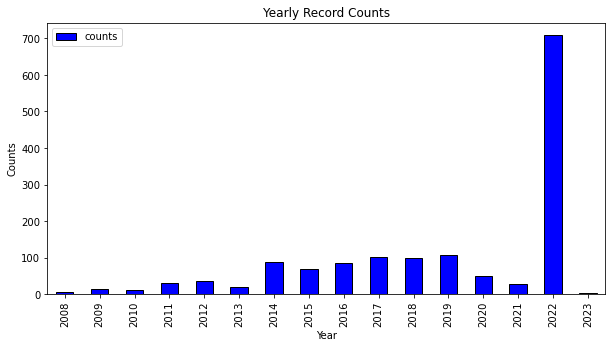

In [8]:
# Count the number of records for each year
yearly_counts = ndf.groupby(ndf['year_of_publish']).size().reset_index(name='counts')

# Plot the bar graph
yearly_counts.plot.bar(x='year_of_publish', y='counts', color='blue', edgecolor='black', figsize=(10, 5))

# Add the title and labels to the graph
plt.title('Yearly Record Counts')
plt.xlabel('Year')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [9]:
ndf[ndf['year_of_publish'] >= 2014].count()

claim               1343
truth_value         1343
topic               1343
year_of_publish     1343
month_of_publish    1343
day_of_publish      1343
dtype: int64

In [10]:
ndf['truth_value'].value_counts()

meter-false           671
tom_ruling_pof        232
meter-mostly-false    187
meter-half-true       169
meter-mostly-true     131
meter-true             66
meter-full-flop         5
meter-half-flip         2
Name: truth_value, dtype: int64

In [11]:
ndf['title'] = ndf['claim']
ndf.drop(['topic'], inplace=True, axis=1)
ndf.head()

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8112/3283046789.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ndf['title'] = ndf['claim']

c:\Users\Lokesh\.conda\envs\dlapp\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  return super().drop(


,claim,truth_value,year_of_publish,month_of_publish,day_of_publish,title
0,Russia’s Army was “destroyed.”,meter-false,2022,December,18,Russia’s Army was “destroyed.”
1,The war in Ukraine is “all over.”,meter-false,2022,December,12,The war in Ukraine is “all over.”
2,“Gas prices are down back to where they were before Russia invaded Ukraine.”,meter-true,2022,November,29,“Gas prices are down back to where they were before Russia invaded Ukraine.”
3,"Images of a woman having bloody makeup applied show ""fake combatant photos” in Ukraine.",meter-false,2022,November,27,"Images of a woman having bloody makeup applied show ""fake combatant photos” in Ukraine."
4,U.S. tax dollars sent to help Ukraine were laundered back by cryptocurrency firm FTX to help Democrats in midterms.,meter-false,2022,November,13,U.S. tax dollars sent to help Ukraine were laundered back by cryptocurrency firm FTX to help Democrats in midterms.


In [12]:
def year_fn(r):
  try:
    return int(r.split('at')[0].split(',')[1].strip())
  except:
    return int('2023')

def month_fn(r):
  try:
    return r.split('at')[0].split(' ')[0].strip()
  except:
    return '2023'

def day_fn(r):
  try:
    return int(r.split('at')[0].split(',')[0].split(' ')[1].strip())
  except:
    return int('2023')

def remove_opinion_str(r):
  try:
    if 'Opinion |' in r:
      r.replace('Opinion | ', '')
    return r
  except:
    return r

tdf = pd.read_csv('washington_post.csv')
tdf.head()
tdf['stated_on'].unique()
tdf['year_of_publish'] = tdf['stated_on'].apply(year_fn)
tdf['month_of_publish'] = tdf['stated_on'].apply(month_fn)
tdf['day_of_publish'] = tdf['stated_on'].apply(day_fn)
tdf['title'] = tdf['title'].apply(remove_opinion_str)

tdf.drop(['stated_on', 'id', 'title'], axis = 1, inplace=True)

In [13]:
tdf.count()

claim                992
truth_value         1000
year_of_publish     1000
month_of_publish    1000
day_of_publish      1000
dtype: int64

In [14]:
df = pd.concat([ndf, tdf])
df.drop(['title'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

full_flop_rows = df.index[df['truth_value'] == 'meter-full-flop']
half_flip_rows = df.index[df['truth_value'] == 'meter-half-flip']
rows_to_delete = full_flop_rows.to_list() + half_flip_rows.to_list()
df.drop(rows_to_delete, inplace=True)
df.reset_index(drop=True, inplace=True)

df.loc[df['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'
df.loc[df['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'

df.dropna(how='all', inplace=True)

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8112/2172314401.py:11: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[df['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8112/2172314401.py:12: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[df['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'


In [15]:
df['truth_value'].value_counts()

meter-true            1066
meter-false            671
tom_ruling_pof         232
meter-mostly-false     187
meter-half-true        169
meter-mostly-true      131
Name: truth_value, dtype: int64

In [16]:
df.to_csv('russia-ukraine.csv')

In [17]:
# res = []
# flagged = {}
# for i, row in df.iterrows():
#   print(i)
#   if flagged.get(i, False):
#     continue
#   for j, dup in df.iterrows():
#     if i != j and row['claim'] == dup['claim']:
#       flagged[j] = True
#   res.append(row)
# fdf = df.copy()
# fdf.drop(index=df.index[list(flagged.keys())], inplace=True)
# fdf.reset_index(drop=True, inplace=True)
# hft = fdf[(fdf['truth_value'] == 'meter-mostly-true') | (fdf['truth_value'] == 'meter-mostly-false')]
# hft.reset_index(drop=True, inplace=True)
# hft.to_csv('hft.csv')
# years = fdf['year_of_publish'].unique()
# # Group the data by year and topic, and count the number of occurrences of each topic
# grouped = fdf.groupby(['year_of_publish']).size().reset_index(name='counts')
# # Plot the bar graph
# plt.figure(figsize=(10, 5))
# plt.bar(grouped['year_of_publish'], grouped['counts'])
# plt.xlabel('Year')
# plt.ylabel('Counts')
# plt.title(f'Bar Graph of {topic} Counts against Years')
# plt.legend()
# plt.show()

In [18]:
fidf = pd.read_csv('./politifact_scraperussia17012023 - politifact_scraperussia17012023.csv')
fidf.drop(['idx', 'origin', 'URL'], axis=1, inplace=True)
fidf.drop_duplicates(subset=['claim'], ignore_index=True, inplace=True)
fidf['year_of_publish'] = fidf['stated_on'].apply(lambda x: int(x[-4:]))
fidf['month_of_publish'] = fidf['stated_on'].apply(lambda x: x.split(',')[0].split(' ')[0].strip())
fidf['day_of_publish'] = fidf['stated_on'].apply(lambda x: int(x.split(',')[0].split(' ')[1]))
fidf.drop(['stated_on'], axis=True, inplace=True)

full_flop_rows = fidf.index[fidf['truth_value'] == 'meter-full-flop']
half_flip_rows = fidf.index[fidf['truth_value'] == 'meter-half-flip']
rows_to_delete = full_flop_rows.to_list() + half_flip_rows.to_list()
fidf.drop(rows_to_delete, inplace=True)
fidf.reset_index(drop=True, inplace=True)

fidf.loc[fidf['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'
fidf.loc[fidf['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'

fidf.dropna(how='all', inplace=True)

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8112/2788787878.py:15: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fidf.loc[fidf['truth_value'] == 'tom_ruling_pof']['truth_value'] = 'meter-false'

C:\Users\Lokesh\AppData\Local\Temp/ipykernel_8112/2788787878.py:16: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fidf.loc[fidf['truth_value'] == 'meter-half-true']['truth_value'] = 'meter-mostly-true'


In [19]:
fidf.columns

Index(['claim', 'truth_value', 'topic', 'year_of_publish', 'month_of_publish',
       'day_of_publish'],
      dtype='object')

In [20]:
fidf['truth_value'].value_counts()

meter-false           1735
meter-mostly-false    1035
meter-half-true        995
meter-mostly-true      886
tom_ruling_pof         826
meter-true             652
meter-no-flip            8
Name: truth_value, dtype: int64

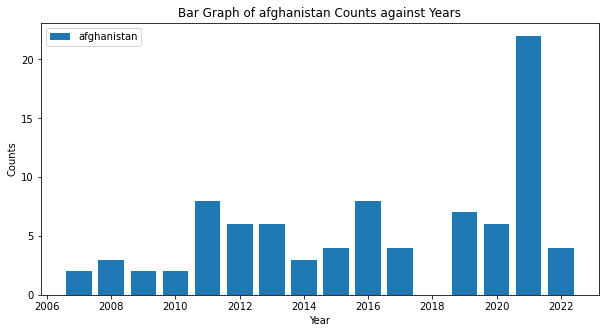

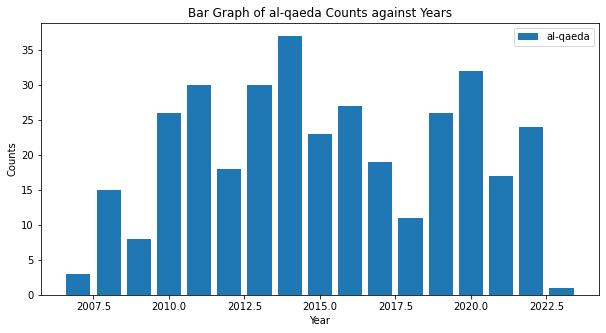

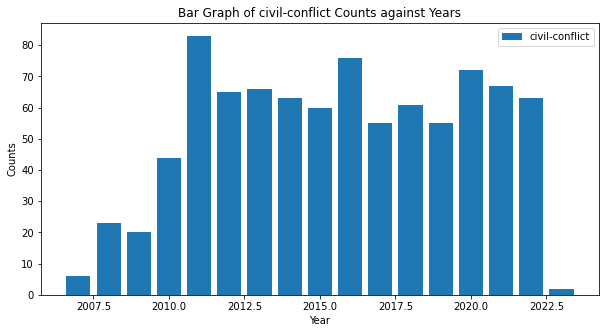

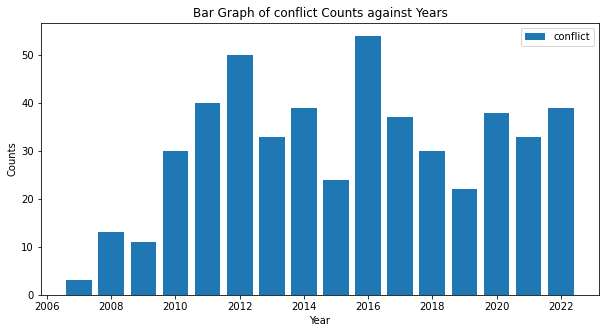

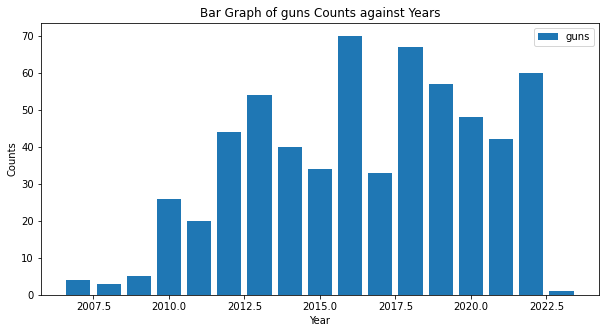

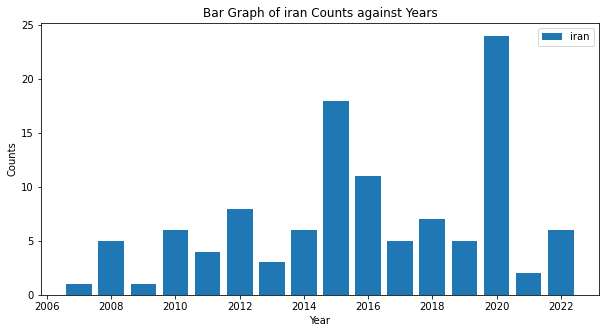

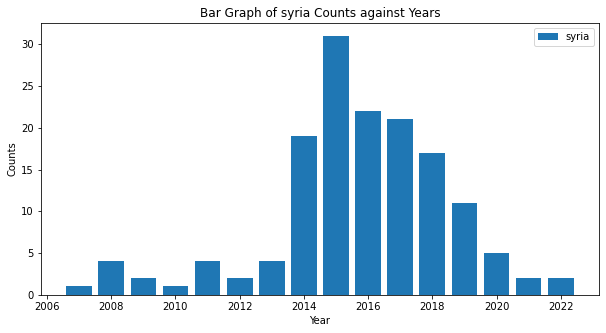

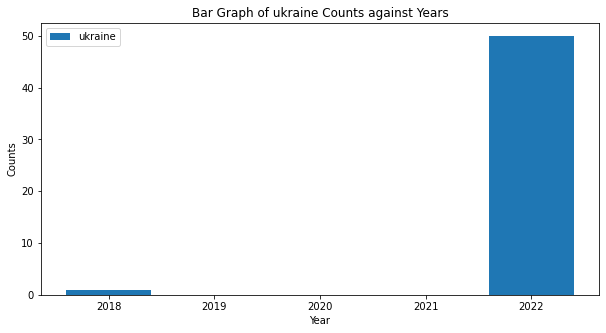

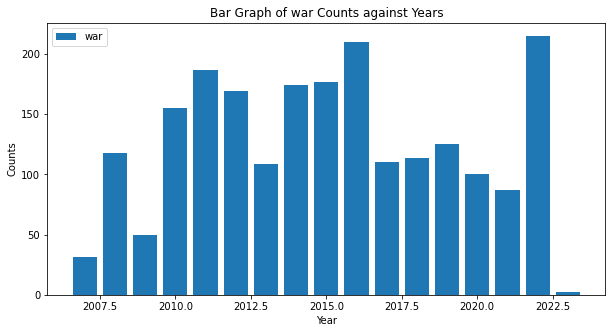

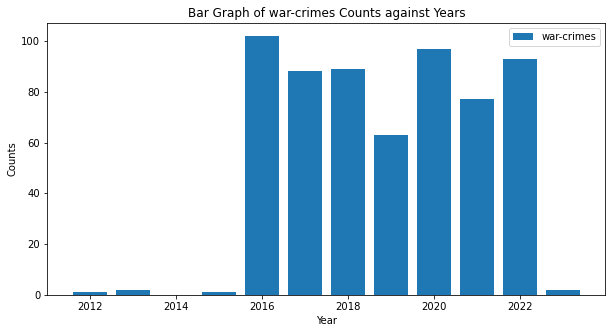

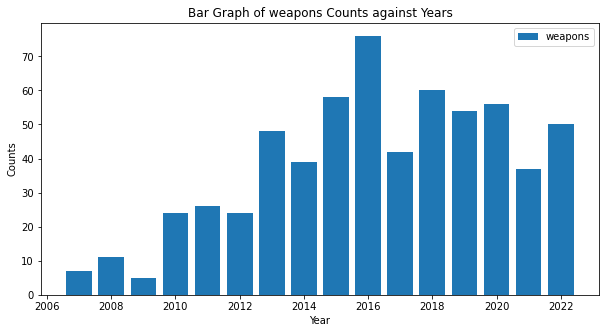

In [21]:
years = fidf['year_of_publish'].unique()
# Group the data by year and topic, and count the number of occurrences of each topic
grouped = fidf.groupby(['year_of_publish', 'topic']).size().reset_index(name='counts')
# Plot the bar graph
for topic, group in grouped.groupby('topic'):
    if topic in ['eritrea', 'myanmar', 'burma', 'yemen', 'ethiopia', 'insurgency']:
        continue
    plt.figure(figsize=(10, 5))
    plt.bar(group['year_of_publish'], group['counts'], label=topic)
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title(f'Bar Graph of {topic} Counts against Years')
    plt.legend()
    plt.show()

fidf.drop(['topic'], axis=True, inplace=True)

In [22]:
finaldf = pd.concat([tdf, fidf])
finaldf.drop(finaldf.index[finaldf['truth_value'] == 'meter-no-flip'], inplace=True)
finaldf.reset_index(drop=True, inplace=True)
finaldf.head()

,claim,truth_value,year_of_publish,month_of_publish,day_of_publish
0,"Italian former Premier Silvio Berlusconi has once again put himself at odds with current Premier Giorgia Meloni by openly criticizing her for meeting with Ukraine’s leader, whom he blamed for the nearly year-old Russian invasion",meter-true,2023,February,13
1,"Former Premier Silvio Berlusconi has once again put himself at odds with Premier Giorgia Meloni by openly criticizing her for meeting with Ukraine’s leader, whom he blamed for the year-old Russian invasion",meter-true,2023,February,13
2,The small coal-mining town of Vuhledar on Ukraine’s eastern front line has emerged as a critical hot spot in the fight for Donetsk province,meter-true,2023,February,11
3,"Amid inflation, power-grid cuts and other pressures applied by Russia and spilling over from the war in Ukraine, Moldova’s government resigned Friday.",meter-true,2023,February,11
4,President Joe Biden will travel to Poland later this month to rally allies a year after Russia’s assault on Ukraine began,meter-true,2023,February,11


In [23]:
finaldf['truth_value'] = finaldf['truth_value'].replace('tom_ruling_pof', 'meter-false')
finaldf['truth_value'] = finaldf['truth_value'].replace('meter-half-true', 'meter-mostly-true')


In [24]:
finaldf.count(), finaldf['truth_value'].value_counts()

(claim               7121
 truth_value         7129
 year_of_publish     7129
 month_of_publish    7129
 day_of_publish      7129
 dtype: int64,
 meter-false           2561
 meter-mostly-true     1881
 meter-true            1652
 meter-mostly-false    1035
 Name: truth_value, dtype: int64)

In [25]:
rdf = pd.read_csv('reuters.csv')
rdf.loc[rdf['dateOfPublish'].str.contains('GMT'), 'dateOfPublish'] = 'February 16, 2023'
rdf.drop_duplicates(subset=['claim'], ignore_index=True, inplace=True)
rdf['year_of_publish'] = rdf['dateOfPublish'].apply(lambda x: int(x[-4:]))
rdf['month_of_publish'] = rdf['dateOfPublish'].apply(lambda x: x.split(',')[0].split(' ')[0].strip())
rdf['day_of_publish'] = rdf['dateOfPublish'].apply(lambda x: int(x.split(',')[0].split(' ')[1]))
rdf.drop(['dateOfPublish'], axis=1, inplace=True)
rdf.loc[rdf['claim'].str.contains('article with'), 'claim'] = rdf['claim'].str.replace(r', article with.*', '', regex=True)
rdf['truth_value'] = 'meter-true'
rdf.head()

,claim,year_of_publish,month_of_publish,day_of_publish,truth_value
0,"Indonesia military ready for operation to free NZ pilot, if talks fail",2023,February,16,meter-true
1,NEWSMAKER Al Qaeda's new leader Adel has $10 million bounty on his head,2023,February,16,meter-true
2,Ukraine war: major developments since Russia's invasion,2023,February,16,meter-true
3,Russia declares battlefield gains as Ukraine urges faster military aid,2023,February,16,meter-true
4,"IMF revises Congo's 2022 growth up to 8.5%, rebel conflict a concern",2023,February,15,meter-true


In [26]:
finaldf['truth_value'].value_counts()

meter-false           2561
meter-mostly-true     1881
meter-true            1652
meter-mostly-false    1035
Name: truth_value, dtype: int64

In [52]:
finaldf = pd.concat([finaldf, rdf])
finaldf.drop_duplicates(ignore_index=True, inplace=True)
finaldf.dropna(inplace=True)
ldf = finaldf.copy()

<AxesSubplot:>

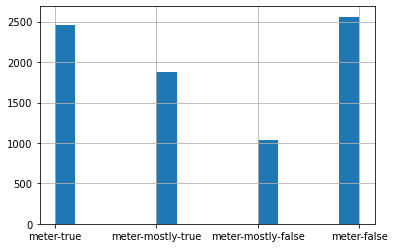

In [53]:
ldf['truth_value'].hist(bins=15)

In [54]:
ldf.to_csv('latest.csv')

In [55]:
import nltk
from wordcloud import WordCloud

def print_df_details(dataframe):
  #print the word-cloud of the english translated version
  mostcommon = nltk.FreqDist(dataframe['claim']).most_common(150)
  wordcloud = WordCloud(width=400, height=400, background_color='white').generate(str(mostcommon))
  fig = plt.figure(figsize=(10,10), facecolor='white')
  plt.imshow(wordcloud) #, interpolation="bilinear")
  plt.axis('off')

  #print the number of unique characters in each class
  results = set()
  dataframe['claim'].str.lower().str.split().apply(results.update)
  print("Number of unique words in class: ", len(results))

Number of unique words in class:  9807


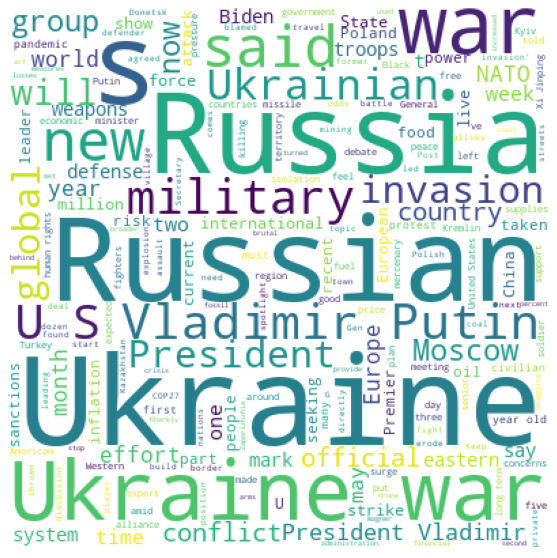

In [56]:
print_df_details(ldf[ldf['truth_value'] == 'meter-true'])

Number of unique words in class:  11353


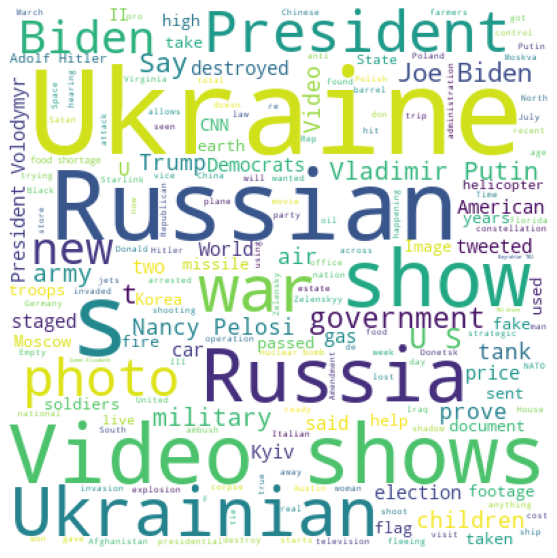

In [57]:
print_df_details(ldf[ldf['truth_value'] == 'meter-false'])

Number of unique words in class:  6244


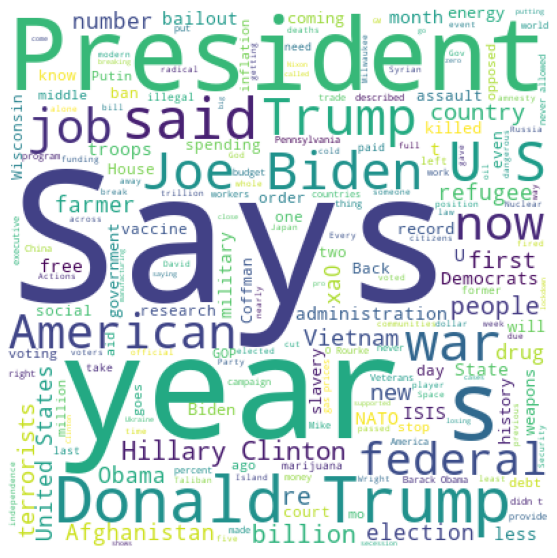

In [58]:
print_df_details(ldf[ldf['truth_value'] == 'meter-mostly-false'])

Number of unique words in class:  8840


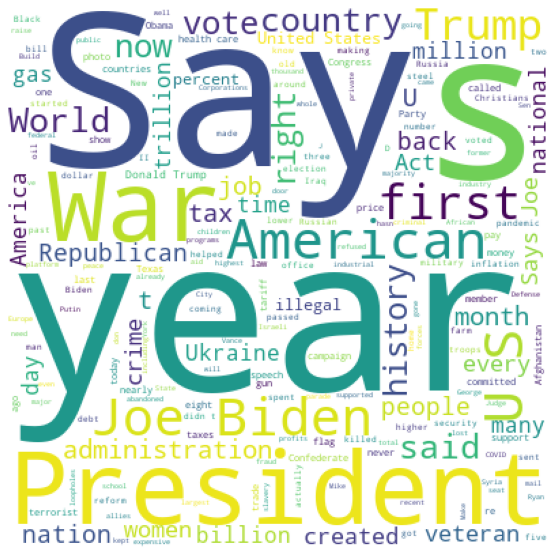

In [59]:
print_df_details(ldf[ldf['truth_value'] == 'meter-mostly-true'])

In [60]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.pyplot as plt

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    colors = ['orange','blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='Not')
        blue_patch = mpatches.Patch(color='blue', label='Real')
        plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cdf = pd.read_csv('/kaggle/input/latest/latest.csv')
cdf['truth_value'] = le.fit_transform(cdf['truth_value'])

X = cdf['claim']
y = cdf['truth_value']
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Count Vectorizer a.k.a. Bag-Of-Words representation
def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer


X_train_counts, count_vectorizer = cv(xtrain)
X_valid_counts = count_vectorizer.transform(xtest)


In [4]:
#Term-Frequency, Inverse-Document Frequency representation
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer


X_train_tfidf, tfidf_vectorizer = tfidf(xtrain)
X_valid_tfidf = tfidf_vectorizer.transform(xtest)


In [5]:
#Check the maximum number of words in a sentence
#Helps with padding
xtrain.apply(lambda x: len(str(x).split())).max()


81

# Machine Learning Algos

In [6]:
#Logistic Regression with TF-IDF
from sklearn.linear_model import LogisticRegression
import sklearn

clf = LogisticRegression(C=1.0, multi_class='ovr', solver='liblinear')
clf.fit(X_train_tfidf, ytrain)
predictions = clf.predict_proba(X_valid_tfidf)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

accuracy = sklearn.metrics.accuracy_score(predictions,ytest)
accuracy


0.5793450881612091

In [7]:
#Logistic Regression with Bag-of-Words representation
clf.fit(X_train_counts, ytrain)
predictions = clf.predict_proba(X_valid_counts)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

accuracy = sklearn.metrics.accuracy_score(predictions,ytest)
accuracy

0.5547858942065491

In [8]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_counts, ytrain)
predictions = clf.predict_proba(X_valid_counts)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

accuracy = sklearn.metrics.accuracy_score(predictions, ytest)
accuracy


0.5906801007556675

In [9]:
#Support Vector Machine
from sklearn.svm import SVC

clf = SVC(C=1.0, probability=True) # since we need probabilities
clf.fit(X_train_tfidf, ytrain)
predictions = clf.predict_proba(X_valid_tfidf)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

accuracy = sklearn.metrics.accuracy_score(predictions,ytest)
accuracy

0.5894206549118388

In [10]:
#XG-Boost classifier
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(X_train_tfidf, ytrain)
predictions = clf.predict_proba(X_valid_tfidf)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

accuracy = sklearn.metrics.accuracy_score(predictions,ytest)
accuracy


0.5308564231738035

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_counts, ytrain)
predictions = clf.predict_proba(X_valid_counts)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

accuracy = sklearn.metrics.accuracy_score(predictions, ytest)
accuracy

0.5667506297229219

# Deep Learning Algos

In [12]:
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence, text

#Maximum number of characters in a sentence = 44
tk = text.Tokenizer(num_words=1000)
tk.fit_on_texts(xtrain)
tokenized_train = tk.texts_to_sequences(xtrain)
X_train = sequence.pad_sequences(tokenized_train, maxlen=90)
tokenized_test = tk.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(tokenized_test, maxlen=90)



In [13]:
batch_size = 256
epochs = 10
embed_size = 90
model = Sequential()
model.add(Embedding(1000, output_dim=embed_size,
          input_length=90, trainable=False))
#LSTM
model.add(LSTM(units=128, return_sequences=True,
          recurrent_dropout=0.25, dropout=0.25))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 90)            90000     
                                                                 
 lstm (LSTM)                 (None, 90, 128)           112128    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 253,649
Trainable params: 163,649
Non-trainable params: 90,000
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = model.fit(X_train, ytrain, validation_split=0.2, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
20/20 [==============================] - 23s 836ms/step - loss: -14.1857 - accuracy: 0.1354 - val_loss: -35.1062 - val_accuracy: 0.1244
Epoch 2/10
20/20 [==============================] - 15s 750ms/step - loss: -79.3115 - accuracy: 0.1319 - val_loss: -131.9449 - val_accuracy: 0.1244
Epoch 3/10
20/20 [==============================] - 16s 789ms/step - loss: -225.8164 - accuracy: 0.1319 - val_loss: -315.3790 - val_accuracy: 0.1244
Epoch 4/10
20/20 [==============================] - 15s 770ms/step - loss: -469.3354 - accuracy: 0.1319 - val_loss: -601.7123 - val_accuracy: 0.1244
Epoch 5/10
20/20 [==============================] - 15s 761ms/step - loss: -829.6229 - accuracy: 0.1319 - val_loss: -993.8570 - val_accuracy: 0.1244
Epoch 6/10
20/20 [==============================] - 14s 718ms/step - loss: -1300.9137 - accuracy: 0.1319 - val_loss: -1502.2037 - val_accuracy: 0.1244
Epoch 7/10
20/20 [==============================] - 15s 770ms/step - loss: -1896.7819 - accuracy: 0.1319 - 

In [15]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,ytrain)[1]*100 , "%")

199/199 [==============================] - 9s 45ms/step - loss: -4944.5063 - accuracy: 0.1304
Accuracy of the model on Training Data is -  13.039369881153107 %


In [16]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(xtest,ytest)[1]*100 , "%")

50/50 [==============================] - 2s 48ms/step - loss: -4932.7603 - accuracy: 0.1304
Accuracy of the model on Testing Data is -  13.035264611244202 %
